In [3]:
from sklearn import datasets
import numpy as np

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data[:, [2, 3]]

In [6]:
Y = iris.target

In [7]:
from sklearn.cross_validation import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
from sklearn.linear_model import Perceptron

In [14]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)

In [15]:
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [16]:
y_pred = ppn.predict(X_test_std)
from sklearn.metrics import accuracy_score

In [17]:
print "No. of misclassified samples :- {}".format((y_test <> y_pred).sum())
print "Accuracy % :- {}".format(accuracy_score(y_test, y_pred) * 100.0)

No. of misclassified samples :- 4
Accuracy % :- 91.1111111111


In [18]:
from sklearn.linear_model import *

In [19]:
lr = LogisticRegression(C=1000.0, random_state=0)

In [20]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [21]:
from sklearn.svm import SVC

In [22]:
svm = SVC(kernel = "linear", C= 1.0, random_state=0)

In [23]:
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
np.random.seed(0)

In [25]:
X_xor = np.random.randn(200,2)

In [26]:
y_xor = np.logical_xor(X_xor[:,0] > 0 , X_xor[:,1] > 0)

In [27]:
y_xor = np.where(y_xor, 1, -1)

In [28]:
from matplotlib import pyplot as plt

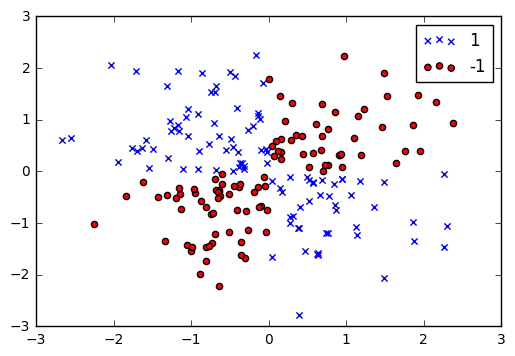

In [29]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],c='b', marker='x', label = '1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],c='r', marker='o', label = '-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

In [58]:
svm = SVC(kernel="rbf", random_state=0, gamma=0.1, C= 10.0)

In [59]:
svm.fit(X_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
from matplotlib.colors import ListedColormap
from matplotlib import pyplot


def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # print np.array([xx1.ravel(), xx2.ravel()]).T
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # print Z
    # print type(Z)
    Z = Z.reshape(xx1.shape)
    pyplot.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    pyplot.xlim(xx1.min(), xx1.max())
    pyplot.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        pyplot.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
    pyplot.show()

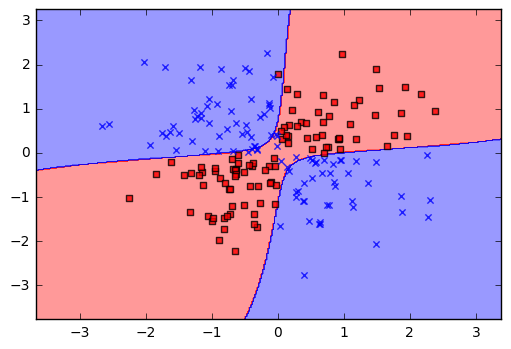

In [61]:
plot_decision_regions(X_xor, y_xor, classifier=svm)

In [67]:
test_mat = np.random.randn(100, 2)
test_mat.shape

(100L, 2L)

In [73]:
np.mat(test_mat)[:2].I

matrix([[  9.54679472, -16.73248402],
        [ 37.86464901, -62.1647837 ]])